# Encoding (Label encoding and One-hot encoding)


These are simple exercises useful for notebook 2

In [14]:
import pandas as pd

Open 'grades.csv' and use appropriate encoding technique to convert to numerical data

In [15]:
df = pd.read_csv("grades.csv")
df

,Name,Grades
0,Nilesh,A
1,Jhon,S
2,James,C
3,Ravi,F
4,Sita,S
5,Raju,E
6,Praful,F
7,Ganga,B
8,Ram,A
9,Rahim,S


In [16]:
# write a function to do Label encoding
def label_encoding(column):
    grades = ["S", "A", "B", "C", "D", "E", "F"]
    labels = list(range(len(grades)))
    grade_map = dict(zip(grades, labels))
    Labeled_data = [grade_map[grade] for grade in column]
    return Labeled_data

df['Grades_LabelEncoded'] = label_encoding(df['Grades'])
df_label = df[['Name', 'Grades_LabelEncoded']]
df_label

,Name,Grades_LabelEncoded
0,Nilesh,1
1,Jhon,0
2,James,3
3,Ravi,6
4,Sita,0
5,Raju,5
6,Praful,6
7,Ganga,2
8,Ram,1
9,Rahim,0


Open 'colors.csv' and use appropriate encoding technique to convert to numerical data

In [17]:
df = pd.read_csv("color.csv")
df

,Objects,Color
0,Leaves,Green
1,Blood,Red
2,Sea,Blue
3,Rose,Red
4,Sun flower,Yellow
5,Apple,Red
6,Mango,Yellow
7,Banana,Yellow


Hint : you can achieve using pandas (no need for sklearn) check the documentation

In [18]:
df_one_hot = pd.get_dummies(df, columns=['Color'])
df_one_hot

,Objects,Color_Blue,Color_Green,Color_Red,Color_Yellow
0,Leaves,0,1,0,0
1,Blood,0,0,1,0
2,Sea,1,0,0,0
3,Rose,0,0,1,0
4,Sun flower,0,0,0,1
5,Apple,0,0,1,0
6,Mango,0,0,0,1
7,Banana,0,0,0,1


Answer the following for both the data 

- What are the categories in the data?
- what is the relationship between different categories in the grades column?
- Which encoding to be used Label encoding or one-hot encoding?


Note: If there is need of any assumption on grades assume grades follow pattern as it is in IIT M


1. Grades Dataset:
    * Categories in the data = ["S", "A", "B", "C", "D", "E", "F"]
    * Descending order of value of grades = ["S", "A", "B", "C", "D", "E", "F"]. Each grade is better than any grade that follows it in this list.
    * We have to use **label encoding** as there is an inherent ranking order in the data.
    
2. Colours Dataset:
    * Categories in the data = ["Blue", "Green", "Red", "Yellow"]
    * There is no inherent ranking in the categories, no relationship between the categories.
    * We have to use **one-hot encoding** as there is no ranking among the colours.

# Regularized Least Squares

## Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$





Complete the following functions for ridge rigression using gradient descent (without sklearn)  

- You can reuse the functions you have written in last week
- Also you need to change gradient and cost accordingly

Hint: If you use numpy for gradient calculation for theta, you may have to flatten the numpy array

In [19]:
def computeCost(X, y, theta, lamda):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : with n features
    
    y : with (len(X),1)
    theta : array_like -> The parameters for the regression function. This is a vector of 
        shape (n+1, 1).
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # You need to return the following variables correctly
    J = 0.5 * np.mean(np.square(y - np.dot(X, theta)) + lamda*np.dot(theta.T, theta))
    return J

In [20]:
def gradientDescent(X_appended, y, theta, alpha, lamda=10,max_iters= 1000):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : with n degree polynomial features 
    
    y : array with shape of (len(X), 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    max_iters: maximum no of iteration
    
    Returns
    -------
    theta : array wih shape of (n,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Initialize some useful values
    M = X_appended.shape[0]
    J_history = []
    
    for i in range(max_iters):
        theta = theta - (alpha/M) * (np.dot(X_appended.T, (np.dot(X_appended, theta) - y)) + lamda*theta)
        cost = computeCost(X_appended, y, theta, lamda)
        J_history.append(cost)
    
    return theta, J_history

Load "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating ridge rigression

Note: use np.load()

In [21]:
import numpy as np
from matplotlib import pyplot as plt
data = np.load("dataWeek4Train.npz")
data_test = np.load("dataWeek4Test.npz")

In [22]:
x = data['X_train']
y_train = data['y_train'].reshape(-1, 1)

xtest = data_test['X_test']
y_test = data_test['y_test'].reshape(-1, 1)

m = x.shape[0]
mtest = xtest.shape[0]
X_train = np.c_[np.ones(m), x, np.square(x), x**3]
X_test = np.c_[np.ones(mtest), xtest, xtest**2, xtest**3]

Using functions written above try to fit the data with polynomial of degree 3 and 
 
- plot the fit on train data, for $\lambda$ = [0,100,10000] 

- take learning rate (here it is alpha) 0.0001, 
- max_iters as 1000 (you can change if you wish)

- Write comment how the fit changes as lambda and what is the reason?

Value of the regularization parameter = 0
Learned parameters: [-0.00435924] [-0.09127371] [1.04018913] [0.00715287]


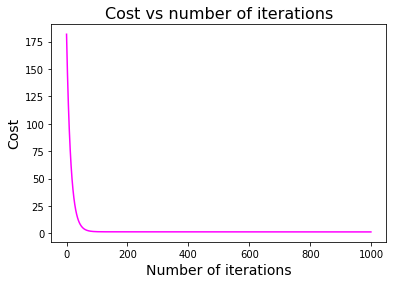

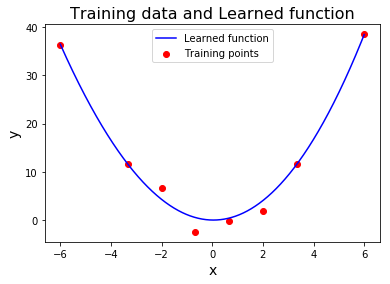

Value of the regularization parameter = 100
Learned parameters: [0.0008349] [-0.07426111] [1.00504345] [0.00664032]


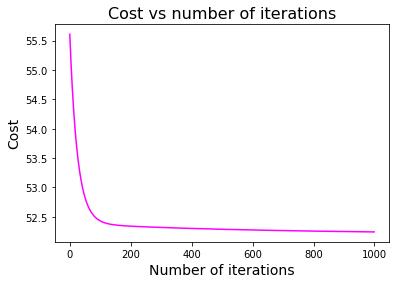

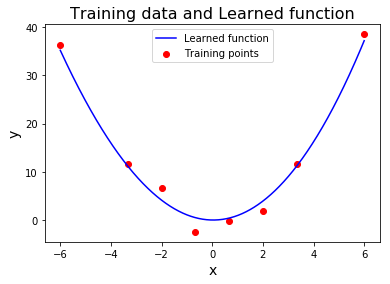

Value of the regularization parameter = 10000
Learned parameters: [0.00799908] [-0.00069241] [0.23195362] [0.00403168]


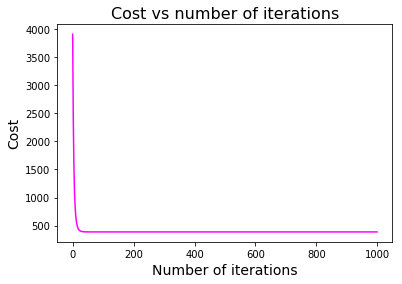

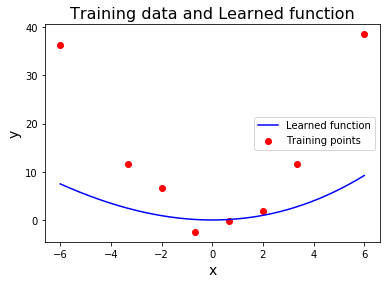

In [23]:
# initialize fitting parameters with zeros
theta = np.zeros((4,1))

alpha = 0.0001
max_iters = 1000
lamda_values = [0,100,10000]

train_loss = []
test_loss = []

for lamda in lamda_values:
    print("Value of the regularization parameter =", lamda)
    theta, J_history = gradientDescent(X_train, y_train, theta, alpha, lamda,max_iters)
    print("Learned parameters:", *theta)
    
    # Cost function
    plt.plot(J_history, color='magenta')
    plt.title("Cost vs number of iterations", size=16)
    plt.xlabel("Number of iterations", size=14)
    plt.ylabel("Cost", size=14)
    plt.show()
    
    # Training data points and function that we have fit
    plt.scatter(x, y_train, color = 'red', label="Training points")
    xval = np.linspace(min(x), max(x), 1000)
    xval_powers = np.c_[np.ones(xval.shape[0]), xval, xval**2, xval**3]
    plt.plot(xval, np.dot(xval_powers, theta), color='blue', label="Learned function")
    plt.legend()
    plt.xlabel("x", size=14)
    plt.ylabel("y", size=14)
    plt.title("Training data and Learned function", size=16)
    plt.show()
    
    # Training Loss and Test Loss (lambda will be 0 here) as we are just finding the mse
    train_loss.append(computeCost(X_train, y_train, theta, 0))
    test_loss.append(computeCost(X_test, y_test, theta, 0))

1. When the value of the regularization parameter is very large, we observe underfitting. The high value of lambda penalizes the coefficients, making them very small in magnitude, forcing a simple function that is not complex enough to represent the distribution of training data points.

2. We can observe from the loss curves that as the value of lambda increases, the loss value (value of the cost function) at the end of the iterations of gradient descent also increases. This is because increase in lambda increases makes the model penalize the coefficients relatively more and the mean square error between the true value and predicted value is penalized less.

Use same data "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating the model for all three models4

In the following exercises you can use inbuilt regressionn functions from sklearn

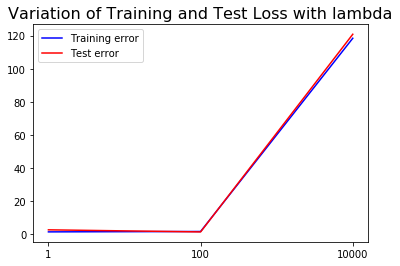

In [24]:
plt.plot(train_loss, color = 'blue', label='Training error')
plt.plot(test_loss, color = 'red', label='Test error')
plt.title("Variation of Training and Test Loss with lambda", size=16)
plt.legend()
plt.xticks([0, 1, 2], [1, 100, 10000])
plt.show()

The model tries to fit a third degree polynomial to the data. It is a good fit, therefore the model with regularization parameter = 100 is the best, having low training error and low test error.

##  Linear Regression (Recap)


Write a generic function decribed in the following cell which takes in data, regression type - lasso,ridge and usual linear , degree of the polynomial and then the alpha values (which are regularization parameters -lambda $\lambda$ , in sklearn they are named as alpha so its just a notaitonal difference).



Hint: Use PolynomialFeatures from sklearn and set bias to Flase

Use 9 degree polynomial features to fit the data using Linear Rigression. Comment on the fit of the model (Overfit, underfit, perfect fit) and also plot prediction on training data along with ground truth

Mean Squared Error is: 1.168989293474482e-19


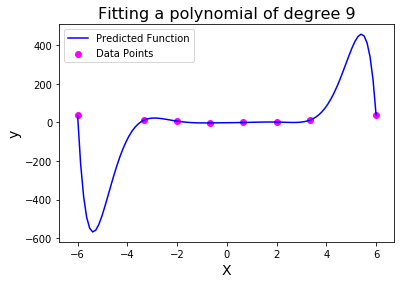

In [168]:
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function

def regression(X, y, reg_type ="ridge", degree = 9, alpha=0.1):
    ''' 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    '''
    poly = PolynomialFeatures(degree)
    X = X.reshape(-1, 1)
    X_transformed = poly.fit_transform(X)

    if reg_type == 'linear':
        reg = LinearRegression()
    if reg_type == 'ridge':
        reg = Ridge(alpha=alpha)
    if reg_type == 'lasso':
        reg = Lasso(alpha=alpha)
    reg.fit(X_transformed, y)
    y_pred = reg.predict(X_transformed)

    Y_hat = y_pred
    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error is:", mse)

    # Visualize
    x_values = np.linspace(min(X), max(X), 100)
    x_values_transformed = poly.fit_transform(x_values.reshape(-1, 1))
    y_values = reg.predict(x_values_transformed)
    plt.plot(x_values, y_values, color = 'blue', label="Predicted Function")
    plt.scatter(X, y, color = 'magenta', label="Data Points")
    plt.title("Fitting a polynomial of degree 9", size=16)
    plt.xlabel("X", size=14)
    plt.ylabel("y", size=14)
    plt.legend()
    plt.show()

    return Y_hat, mse , reg

# Load Data
data = np.load("dataWeek4Train.npz")
data_test = np.load("dataWeek4Test.npz")

x = data['X_train']
y_train = data['y_train'].reshape(-1, 1)

xtest = data_test['X_test']
y_test = data_test['y_test'].reshape(-1, 1)

# Simple Linear Regression
Y_hat, mse , reg = regression(x, y_train, reg_type ="linear", degree = 9)

The model overfits the training data. The training loss (mean square) is very low, but the model does not generalize to the distribution of the data.

## Ridge Rigression and Lasso for polynomial fitting with degree 9
In previous you observed that how the model has fit the training data, now try the same thing using regularization both Ridge and Lasso. Use the generic function that you wrote in previous cell.

 - Now use polynomial regression of order 9 along with Ridge regression and Lasso regression on "dataWeek4Train.npz" for $\lambda= [0, 1, 10^5, 10^{10}]$ and plot the true vs predicted values for each $\lambda$ (Note here that in sklearn lambda is alpha)

- Plot the prediction on training data along with ground truth for various values of $\lambda$ for both ridge and lasso. And also print the coefficients of model for each $\lambda$

- Also plot trainning error vs $\lambda$

Note : Here you can use ridge Rigression from sklearn and also set bias to False in polynomial features  
- You can use library to generate polynomial features

In [201]:
poly = PolynomialFeatures(9)
X_test_transformed = poly.fit_transform(xtest.reshape(-1, 1))

Mean Squared Error is: 2.000307387731585e-08


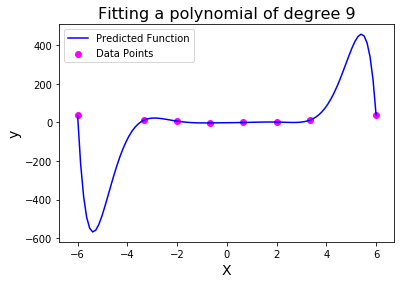

Mean Squared Error is: 0.08781454005993472


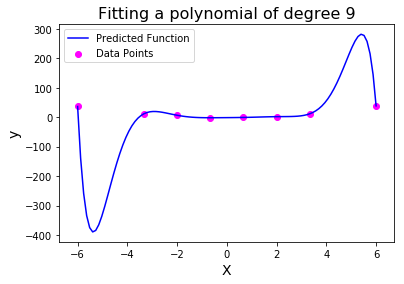

Mean Squared Error is: 4.876340595787316


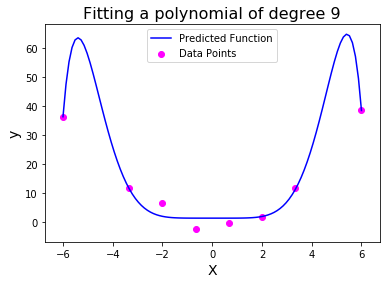

Mean Squared Error is: 22.05217230327158


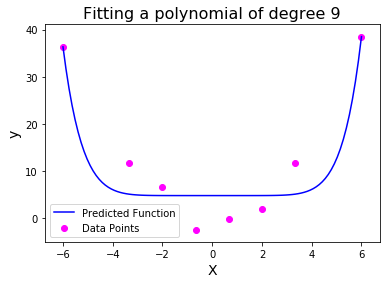

Coefficients for different values of lambda


,lambda_0,lambda_1,lambda_100000,lambda_10000000000
0,0.000000,0.000000,0.000000e+00,0.000000e+00
1,1.553143,0.744120,-7.444815e-05,-8.419445e-10
2,0.160951,0.159228,2.433555e-04,1.373365e-08
3,0.442679,0.192023,-3.106447e-04,-4.102932e-09
4,0.486393,0.481194,1.581067e-03,1.609462e-07
5,-0.454837,-0.278417,-8.543537e-04,-1.857292e-08
6,-0.045596,-0.044991,9.950735e-03,1.788357e-06
7,0.046898,0.029815,6.179089e-05,-8.151447e-08
8,0.000911,0.000898,-2.561499e-04,1.940140e-05
9,-0.000962,-0.000618,-9.432028e-07,1.094908e-07


In [202]:
import warnings
warnings.filterwarnings("ignore")
lamda_values = [0, 1, 10**5, 10**10]

# Ridge
ridge_mse_values = []
ridge_coeffs = []
ridge_test_mse_values = []
for lamda in lamda_values:
    Y_hat, mse , reg = regression(x, y_train, reg_type ="ridge", degree = 9, alpha=lamda)
    ridge_mse_values.append(mse)
    ridge_coeffs.append(reg.coef_.flatten())
    ridge_test_mse_values.append(mean_squared_error(y_test, reg.predict(X_test_transformed)))
    
    
ridge_coeffs = np.array(ridge_coeffs).T
df_ridge = pd.DataFrame(ridge_coeffs, columns = ["lambda_0", "lambda_1", "lambda_100000", "lambda_10000000000"])
print("Coefficients for different values of lambda")
df_ridge

#### Training Error vs $\lambda$ for Ridge Regression

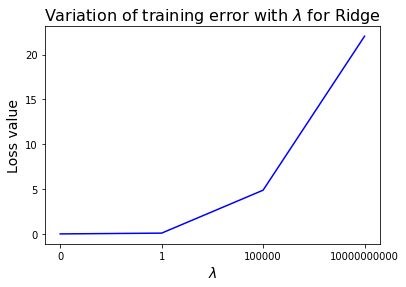

In [203]:
plt.plot(ridge_mse_values, color='blue')
plt.title("Variation of training error with $\lambda$ for Ridge", size=16)
plt.xticks([0, 1, 2, 3], [0, 1, 10**5, 10**10])
plt.xlabel("$\lambda$", size=14)
plt.ylabel("Loss value", size=14)
plt.show()


### Lasso Regression

$$\hat{\theta} = argmin_{\theta}(\frac{1}{2} \sum_{i=1}^{N} (y_i-\theta_0-\sum_{j=1}^p x_{ij}\theta_j)^2 + \lambda \sum_{j=1}^{p}|\theta_j|)$$

Mean Squared Error is: 1.1955261089328686


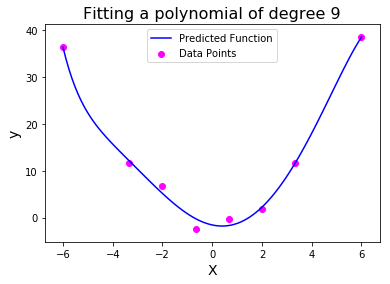

Mean Squared Error is: 2.0460671132532804


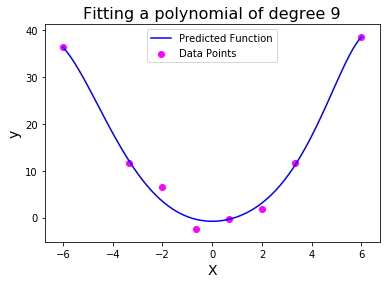

Mean Squared Error is: 22.07614905729678


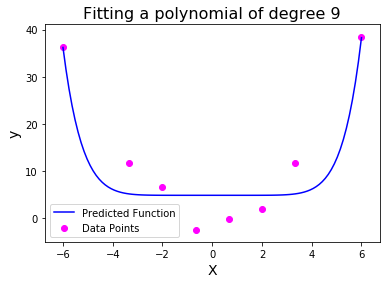

Mean Squared Error is: 222.2019597550688


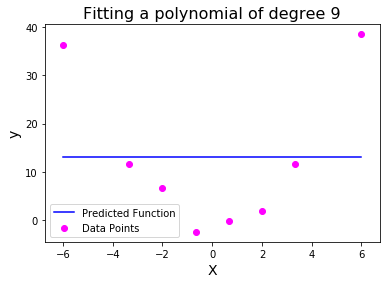

Coeffiecients for different values of lambda


,lambda_0,lambda_1,lambda_100000,lambda_10000000000
0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,-1.145507e+00,-0.000000e+00,-0.000000e+00,0.0
2,1.385000e+00,9.453608e-01,0.000000e+00,0.0
3,1.059994e-01,-2.854683e-02,-0.000000e+00,0.0
4,-1.818427e-02,1.974308e-02,0.000000e+00,0.0
5,-4.773709e-04,1.777478e-03,0.000000e+00,0.0
6,1.797614e-04,-3.711873e-04,0.000000e+00,0.0
7,-2.839963e-05,-1.303986e-05,0.000000e+00,0.0
8,2.571168e-06,-2.443387e-06,1.930676e-05,0.0
9,-3.253649e-07,-2.900136e-07,1.032789e-07,0.0


In [204]:
# Write your code here, plot the prediction on the train data, and print the coefficients learned for ridge and lasso
# You can combine both Ridge and Lasso, But for Train error vs Lambda, plot them seperately for lasso and ridge
# Lasso
lasso_mse_values = []
lasso_test_mse_values = []
lasso_coeffs = []
lamda_values = [0, 1, 10**5, 10**10]
for lamda in lamda_values:
    Y_hat, mse , reg = regression(x, y_train, reg_type ="lasso", degree = 9, alpha=lamda)
    lasso_mse_values.append(mse)
    lasso_coeffs.append(reg.coef_)
    lasso_test_mse_values.append(mean_squared_error(y_test, reg.predict(X_test_transformed)))
    
lasso_coeffs = np.array(lasso_coeffs).T
df_lasso = pd.DataFrame(lasso_coeffs, columns = ["lambda_0", "lambda_1", "lambda_100000", "lambda_10000000000"])
print("Coeffiecients for different values of lambda")
df_lasso

#### Training Error Vs $\lambda$ for Lasso Regresion

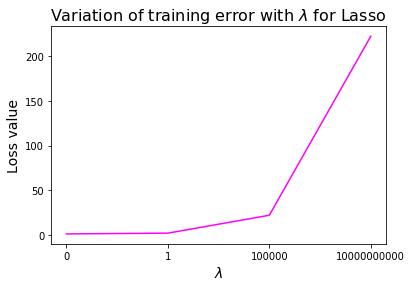

In [205]:
plt.plot(lasso_mse_values, color='magenta')
plt.title("Variation of training error with $\lambda$ for Lasso", size=16)
plt.xticks([0, 1, 2, 3], [0, 1, 10**5, 10**10])
plt.xlabel("$\lambda$", size=14)
plt.ylabel("Loss value", size=14)
plt.show()

1. For both types of regression, Lasso and Ridge, increasing the value of $\lambda$ leads to an increase in the training error.

2. In general, a higher value of $\lambda$ results in smaller coefficients fot the parameters of the model. This help in preventing overfitting. If the $\lambda$ is too high, we might face the problem of underfitting.

3. Lasso Regression performs feature selection, it forces coefficients of some features to zero. In Ridge Regression, the size of the coefficients is penalized, but it does not become zero.

## Ridge Rigression and Lasso for polynomial fitting to predict on validation set

Now use "dataWeek4Test.npz" to validate the model for same values of $\lambda$s ($\lambda= [0, 1, 10^5, 10^{10}]$) used in previous case. And plot $\lambda$ vs validation error.  
- Note : No need to plot the prediction on validation set since the validation points are very few
- Print the learned coefficients for Lasso and Ridge rigression and write your observations

Hint: Think of the property of Lasso Rigression (for writing observations)

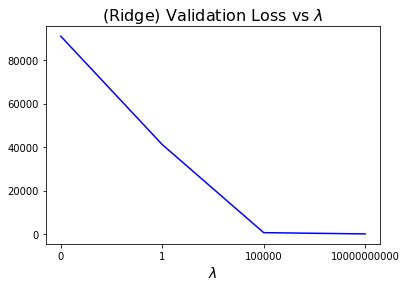

Coefficients


,lambda_0,lambda_1,lambda_100000,lambda_10000000000
0,0.000000,0.000000,0.000000e+00,0.000000e+00
1,1.553143,0.744120,-7.444815e-05,-8.419445e-10
2,0.160951,0.159228,2.433555e-04,1.373365e-08
3,0.442679,0.192023,-3.106447e-04,-4.102932e-09
4,0.486393,0.481194,1.581067e-03,1.609462e-07
5,-0.454837,-0.278417,-8.543537e-04,-1.857292e-08
6,-0.045596,-0.044991,9.950735e-03,1.788357e-06
7,0.046898,0.029815,6.179089e-05,-8.151447e-08
8,0.000911,0.000898,-2.561499e-04,1.940140e-05
9,-0.000962,-0.000618,-9.432028e-07,1.094908e-07


In [216]:
plt.plot(ridge_test_mse_values, color='blue')
plt.title("(Ridge) Validation Loss vs $\lambda$", size=16)
plt.xticks([0, 1, 2, 3], [0, 1, 10**5, 10**10])
plt.xlabel("$\lambda$", size=14)
plt.show()

print("Coefficients")
df_ridge

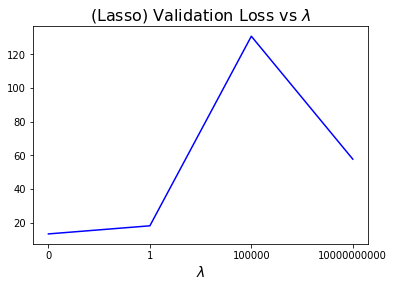

Coefficients for Lasso


,lambda_0,lambda_1,lambda_100000,lambda_10000000000
0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,-1.145507e+00,-0.000000e+00,-0.000000e+00,0.0
2,1.385000e+00,9.453608e-01,0.000000e+00,0.0
3,1.059994e-01,-2.854683e-02,-0.000000e+00,0.0
4,-1.818427e-02,1.974308e-02,0.000000e+00,0.0
5,-4.773709e-04,1.777478e-03,0.000000e+00,0.0
6,1.797614e-04,-3.711873e-04,0.000000e+00,0.0
7,-2.839963e-05,-1.303986e-05,0.000000e+00,0.0
8,2.571168e-06,-2.443387e-06,1.930676e-05,0.0
9,-3.253649e-07,-2.900136e-07,1.032789e-07,0.0


In [217]:
plt.plot(lasso_test_mse_values, color='blue')
plt.title("(Lasso) Validation Loss vs $\lambda$", size=16)
plt.xticks([0, 1, 2, 3], [0, 1, 10**5, 10**10])
plt.xlabel("$\lambda$", size=14)
plt.show()

print("Coefficients for Lasso")
df_lasso

1. In general, a higher value of $\lambda$ results in smaller coefficients fot the parameters of the model. This help in preventing overfitting. If the $\lambda$ is too high, we might face the problem of underfitting.

2. Lasso Regression performs feature selection, it forces coefficients of some features to zero. In Ridge Regression, the size of the coefficients is penalized, but it does not become zero.

### Questions and Observations

- What was your observation in simple linear rigression without regulaization when polynomial features of degree of 9 is used and what is the reason?

Ans: We observe that there is overfitting, as we are using a very complex function (degree 9) to estimate. The number of training examples is low, and there are too many features. Using such a complex function causes it to fit the noise in the data. The model will not be able to generalize to other datasets from the same distribution.
-  As value of lambda increases what happens to the model complexity?

Ans: As value of lambda increases,the model complexity decreases.

- What can be infered from the mean squared error versus lambda?

Ans: Training error increases with increase in $\lambda$. Increasing $\lambda$ penalizes the actual error term less, and the weights of the model more. It reduces the complexity of the model. The model will not fit perfectly to the training data, resulting in an increase in the value of training error. If $\lambda$ is too high, it leads to underfitting (very large bias) resulting in large training error.

Validation error decreases with increase in $\lambda$ up to a point and then it start increasing once again. Initially, increasing $\lambda$ reduces overfitting and helps the model generalize. However if $\lambda$ becomes too high, the model underfits the data, making the validation error and the training error high.

- Statement: Regularization gives finer control over fitting the data than using just change of degree of the polynomial features (True or False) Justify (not mathematical)

Ans: True. The value of $\lambda$ can be tuned in step sizes of our choice and these steps can ber very small, giving finer control over the model complexity than changing the degree of the polynomial as that can be changed only by one unit each time.

- Comment on the train error vs $\lambda$ and validation error vs $\lambda$ what are the observations?

Ans: Training error increases with increase in $\lambda$. Increasing $\lambda$ penalizes the actual error term less, and the weights of the model more. It reduces the complexity of the model. The model will not fit perfectly to the training data, resulting in an increase in the value of training error. If $\lambda$ is too high, it leads to underfitting (very large bias) resulting in large training error.

Validation error decreases with increase in $\lambda$ up to a point and then it start increasing once again. Initially, increasing $\lambda$ reduces overfitting and helps the model generalize. However if $\lambda$ becomes too high, the model underfits the data, making the validation error and the training error high.
